In [55]:
import pandas as pd
import numpy as np
import matplotlib
import recruit_utils
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf, kpss
from sklearn import cluster
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
from bokeh.models import Range1d
import seaborn as sns; sns.set(color_codes=True)

In [2]:
# Import data into pandas data frames
data, stores = recruit_utils.import_data()

C:\Users\luism\PycharmProjects\RecruitRestaurantVisitorForecasting\recruit_utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['tra']['visitor_diff'][mask] = np.nan
C:\Users\luism\PycharmProjects\RecruitRestaurantVisitorForecasting\recruit_utils.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['tes']['visitor_diff'][mask] = np.nan


In [3]:
train, test = recruit_utils.create_train_test(data, stores)

In [4]:
train.head()

,air_store_id,visit_date,visitors,dow,wom,year,month,day,days_since_payday,visitor_diff,...,rv2_y,id,total_reserv_sum,total_reserv_mean,total_reserv_dt_diff_mean,date_int,var_max_lat,var_max_long,lon_plus_lat,air_store_id2
0,air_00a91d42b08b08d9,2016-07-01,35,4,1,2016,7,1,6,-1.0,...,1.0,air_00a91d42b08b08d9_2016-07-01,-1.0,-1.0,-1.0,20160701,8.326629,4.519803,175.447598,0
1,air_00a91d42b08b08d9,2016-07-02,9,5,1,2016,7,2,7,-26.0,...,-1.0,air_00a91d42b08b08d9_2016-07-02,-1.0,-1.0,-1.0,20160702,8.326629,4.519803,175.447598,0
2,air_00a91d42b08b08d9,2016-07-04,20,0,1,2016,7,4,9,11.0,...,-1.0,air_00a91d42b08b08d9_2016-07-04,-1.0,-1.0,-1.0,20160704,8.326629,4.519803,175.447598,0
3,air_00a91d42b08b08d9,2016-07-05,25,1,1,2016,7,5,10,5.0,...,-1.0,air_00a91d42b08b08d9_2016-07-05,-1.0,-1.0,-1.0,20160705,8.326629,4.519803,175.447598,0
4,air_00a91d42b08b08d9,2016-07-06,29,2,1,2016,7,6,11,4.0,...,7.0,air_00a91d42b08b08d9_2016-07-06,-1.0,-1.0,-1.0,20160706,8.326629,4.519803,175.447598,0


In [5]:
test.head()

,id,visitors,visit_date,air_store_id,dow,wom,year,month,day,days_since_payday,...,rs2_y,rv2_y,total_reserv_sum,total_reserv_mean,total_reserv_dt_diff_mean,date_int,var_max_lat,var_max_long,lon_plus_lat,air_store_id2
0,air_00a91d42b08b08d9_2017-04-23,0,2017-04-23,air_00a91d42b08b08d9,6,4,2017,4,23,29,...,-1.0,-1.0,-1.0,-1.0,-1.0,20170423,8.326629,4.519803,175.447598,0
1,air_00a91d42b08b08d9_2017-04-24,0,2017-04-24,air_00a91d42b08b08d9,0,4,2017,4,24,30,...,-1.0,-1.0,-1.0,-1.0,-1.0,20170424,8.326629,4.519803,175.447598,0
2,air_00a91d42b08b08d9_2017-04-25,0,2017-04-25,air_00a91d42b08b08d9,1,4,2017,4,25,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,20170425,8.326629,4.519803,175.447598,0
3,air_00a91d42b08b08d9_2017-04-26,0,2017-04-26,air_00a91d42b08b08d9,2,4,2017,4,26,1,...,-1.0,-1.0,-1.0,-1.0,-1.0,20170426,8.326629,4.519803,175.447598,0
4,air_00a91d42b08b08d9_2017-04-27,0,2017-04-27,air_00a91d42b08b08d9,3,4,2017,4,27,2,...,-1.0,-1.0,-1.0,-1.0,-1.0,20170427,8.326629,4.519803,175.447598,0


In [6]:
stores.head()

,air_store_id,dow,min_visitors,mean_visitors,median_visitors,max_visitors,count_observations,air_genre_name,air_area_name,latitude,...,air_genre_name5,air_area_name5,air_genre_name6,air_area_name6,air_genre_name7,air_area_name7,air_genre_name8,air_area_name8,air_genre_name9,air_area_name9
0,air_00a91d42b08b08d9,0,1.0,22.457143,19.0,47.0,35.0,6,44,35.694003,...,0,0,0,0,0,0,0,0,0,0
1,air_0164b9927d20bcc3,0,2.0,7.500000,6.0,19.0,20.0,6,62,35.658068,...,0,0,0,0,0,0,0,0,0,0
2,air_0241aa3964b7f861,0,2.0,8.920635,8.0,23.0,63.0,7,82,35.712607,...,0,0,0,0,0,0,0,0,0,0
3,air_0328696196e46f18,0,2.0,6.416667,4.0,27.0,12.0,4,98,34.701279,...,0,0,0,0,0,0,0,0,0,0
4,air_034a3d5b40d5b1b1,0,1.0,11.864865,10.0,66.0,37.0,2,102,34.692337,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train['subset'] = "train"
test['subset'] = "test"
combined = pd.concat([train, test])

In [8]:
cluster = recruit_utils.cluster_regions(combined)

In [9]:
train['cluster'] = cluster.predict(train[['longitude', 'latitude']].as_matrix())
test['cluster'] = cluster.predict(test[['longitude', 'latitude']].as_matrix())
stores['cluster'] = cluster.predict(stores[['longitude', 'latitude']].as_matrix())

In [10]:
output_notebook()

Loading BokehJS ...

In [11]:
p1 = figure(title="Air Reservation Visitors Distribution", tools="save",
            background_fill_color="#9D9D9C")

measured = train['mean_visitors']
hist, edges = np.histogram(measured, density=True, bins='fd')

p1.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")

p1.legend.location = "center_right"
p1.legend.background_fill_color = "darkgrey"
p1.xaxis.axis_label = 'Number of visitors'
p1.yaxis.axis_label = 'Frequency'

############################################################################

df = train[['visitors', 'holiday_flg']]
df['holiday_flg'] = df['holiday_flg'].astype('category')

cats = [0, 1]

# find the quartiles and IQR for each category
groups = train[['visitors', 'holiday_flg']].groupby('holiday_flg')
q1 = groups.quantile(q=0.25)
q2 = groups.quantile(q=0.5)
q3 = groups.quantile(q=0.75)
iqr = q3 - q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

# find the outliers for each category
def outliers(group):
    cat = group.name
    return group[(group.visitors > upper.loc[cat]['visitors']) | (group.visitors < lower.loc[cat]['visitors'])]['visitors']
out = groups.apply(outliers).dropna()

# prepare outlier data for plotting, we need coordinates for every outlier.
if not out.empty:
    outx = []
    outy = []
    for cat in cats:
        # only add outliers if they exist
        if not out.loc[cat].empty:
            for value in out[cat]:
                outx.append(cat)
                outy.append(value)


left, right, bottom, top = -1, 2, 0, 100
p2 = figure(title="Visitors by Holiday", tools="save", background_fill_color="#EFE8E2",  
            x_range=Range1d(left, right), y_range=Range1d(bottom, top))

# if no outliers, shrink lengths of stems to be no longer than the minimums or maximums
qmin = groups.quantile(q=0.00)
qmax = groups.quantile(q=1.00)
upper.visitors = [min([x,y]) for (x,y) in zip(list(qmax.loc[:,'visitors']),upper.visitors)]
lower.visitors = [max([x,y]) for (x,y) in zip(list(qmin.loc[:,'visitors']),lower.visitors)]

# stems
p2.segment(cats, upper.visitors, cats, q3.visitors, line_color="black")
p2.segment(cats, lower.visitors, cats, q1.visitors, line_color="black")

# boxes
p2.vbar(cats, 0.7, q2.visitors, q3.visitors, fill_color="#E08E79", line_color="black")
p2.vbar(cats, 0.7, q1.visitors, q2.visitors, fill_color="#3B8686", line_color="black")

# whiskers (almost-0 height rects simpler than segments)
p2.rect(cats, lower.visitors, 0.2, 0.01, line_color="black")
p2.rect(cats, upper.visitors, 0.2, 0.01, line_color="black")

# outliers
if not out.empty:
    p2.circle(outx, outy, size=6, color="#F38630", fill_alpha=0.6)

p2.xgrid.grid_line_color = None
p2.ygrid.grid_line_color = "white"
p2.grid.grid_line_width = 2
p2.xaxis.major_label_text_font_size="12pt"

#########################################################################################

df = train[['visitors', 'dow']]
df['dow'] = df['dow'].astype('category')

cats = [0, 1, 2, 3, 4, 5, 6]

# find the quartiles and IQR for each category
groups = train[['visitors', 'dow']].groupby('dow')
q1 = groups.quantile(q=0.25)
q2 = groups.quantile(q=0.5)
q3 = groups.quantile(q=0.75)
iqr = q3 - q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

# find the outliers for each category
def outliers(group):
    cat = group.name
    return group[(group.visitors > upper.loc[cat]['visitors']) | (group.visitors < lower.loc[cat]['visitors'])]['visitors']
out = groups.apply(outliers).dropna()

# prepare outlier data for plotting, we need coordinates for every outlier.
if not out.empty:
    outx = []
    outy = []
    for cat in cats:
        # only add outliers if they exist
        if not out.loc[cat].empty:
            for value in out[cat]:
                outx.append(cat)
                outy.append(value)


left, right, bottom, top = -1, 7, 0, 100
p3 = figure(title="Visitors by Day of Week", tools="save", background_fill_color="#EFE8E2",  
            x_range=Range1d(left, right), y_range=Range1d(bottom, top))

# if no outliers, shrink lengths of stems to be no longer than the minimums or maximums
qmin = groups.quantile(q=0.00)
qmax = groups.quantile(q=1.00)
upper.visitors = [min([x,y]) for (x,y) in zip(list(qmax.loc[:,'visitors']),upper.visitors)]
lower.visitors = [max([x,y]) for (x,y) in zip(list(qmin.loc[:,'visitors']),lower.visitors)]

# stems
p3.segment(cats, upper.visitors, cats, q3.visitors, line_color="black")
p3.segment(cats, lower.visitors, cats, q1.visitors, line_color="black")

# boxes
p3.vbar(cats, 0.7, q2.visitors, q3.visitors, fill_color="#E08E79", line_color="black")
p3.vbar(cats, 0.7, q1.visitors, q2.visitors, fill_color="#3B8686", line_color="black")

# whiskers (almost-0 height rects simpler than segments)
p3.rect(cats, lower.visitors, 0.2, 0.01, line_color="black")
p3.rect(cats, upper.visitors, 0.2, 0.01, line_color="black")

# outliers
if not out.empty:
    p3.circle(outx, outy, size=6, color="#F38630", fill_alpha=0.6)

p3.xgrid.grid_line_color = None
p3.ygrid.grid_line_color = "white"
p3.grid.grid_line_width = 2
p3.xaxis.major_label_text_font_size="12pt"

#########################################################################################

df = train[['visitors', 'cluster']]
df['cluster'] = df['cluster'].astype('category')

cats = list(np.unique(train[['cluster']].as_matrix()))

# find the quartiles and IQR for each category
groups = train[['visitors', 'cluster']].groupby('cluster')
q1 = groups.quantile(q=0.25)
q2 = groups.quantile(q=0.5)
q3 = groups.quantile(q=0.75)
iqr = q3 - q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

# find the outliers for each category
def outliers(group):
    cat = group.name
    return group[(group.visitors > upper.loc[cat]['visitors']) | (group.visitors < lower.loc[cat]['visitors'])]['visitors']
out = groups.apply(outliers).dropna()

# prepare outlier data for plotting, we need coordinates for every outlier.
if not out.empty:
    outx = []
    outy = []
    for cat in cats:
        # only add outliers if they exist
        if not out.loc[cat].empty:
            for value in out[cat]:
                outx.append(cat)
                outy.append(value)


left, right, bottom, top = -1, 6, 0, 100
p4 = figure(title="Visitors by Location Cluster", tools="save", background_fill_color="#EFE8E2",  
            x_range=Range1d(left, right), y_range=Range1d(bottom, top))

# if no outliers, shrink lengths of stems to be no longer than the minimums or maximums
qmin = groups.quantile(q=0.00)
qmax = groups.quantile(q=1.00)
upper.visitors = [min([x,y]) for (x,y) in zip(list(qmax.loc[:,'visitors']),upper.visitors)]
lower.visitors = [max([x,y]) for (x,y) in zip(list(qmin.loc[:,'visitors']),lower.visitors)]

# stems
p4.segment(cats, upper.visitors, cats, q3.visitors, line_color="black")
p4.segment(cats, lower.visitors, cats, q1.visitors, line_color="black")

# boxes
p4.vbar(cats, 0.7, q2.visitors, q3.visitors, fill_color="#E08E79", line_color="black")
p4.vbar(cats, 0.7, q1.visitors, q2.visitors, fill_color="#3B8686", line_color="black")

# whiskers (almost-0 height rects simpler than segments)
p4.rect(cats, lower.visitors, 0.2, 0.01, line_color="black")
p4.rect(cats, upper.visitors, 0.2, 0.01, line_color="black")

# outliers
if not out.empty:
    p4.circle(outx, outy, size=6, color="#F38630", fill_alpha=0.6)

p4.xgrid.grid_line_color = None
p4.ygrid.grid_line_color = "white"
p4.grid.grid_line_width = 2
p4.xaxis.major_label_text_font_size="12pt"

##############################################################################################################

show(gridplot(p1,p2,p3,p4, ncols=2, plot_width=400, plot_height=400, toolbar_location=None))

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\ipykernel_launcher.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\ipykernel_launcher.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

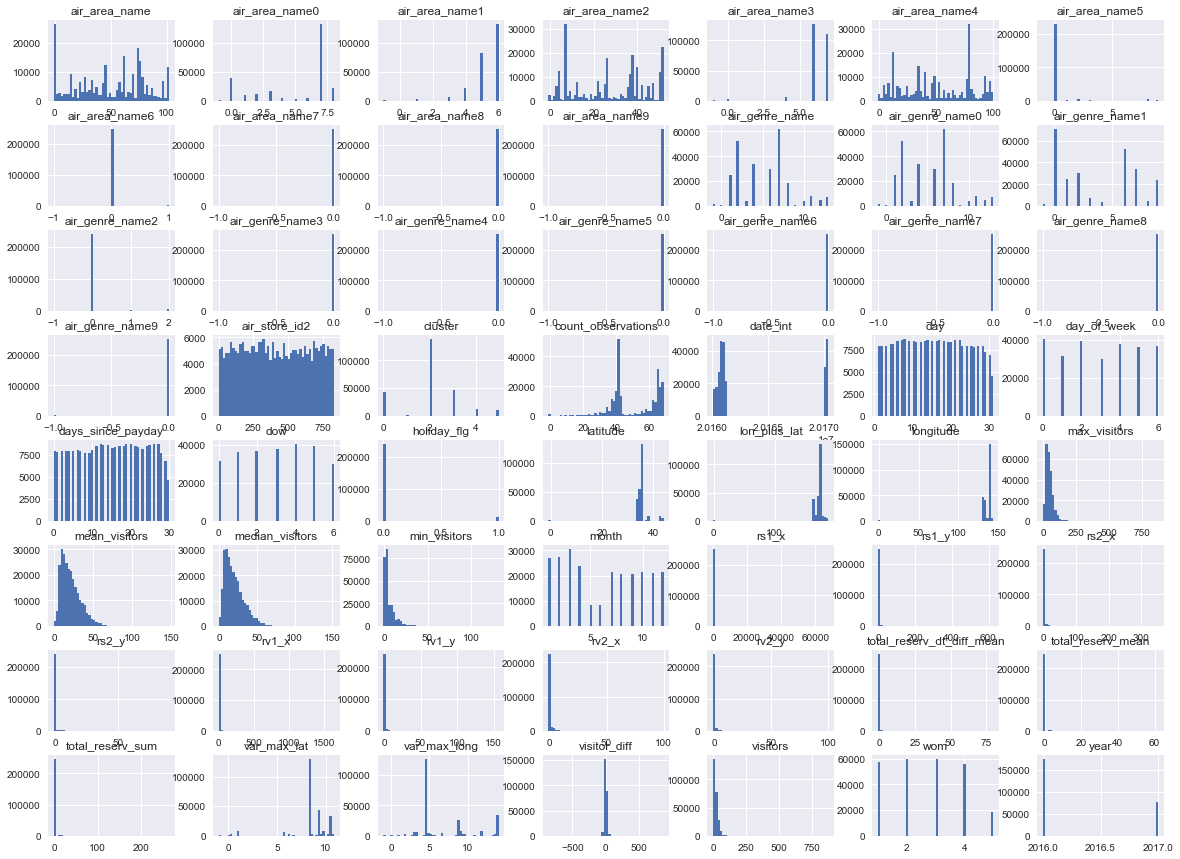

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20, 15))
plt.show()

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\matplotlib\collections.py:877: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


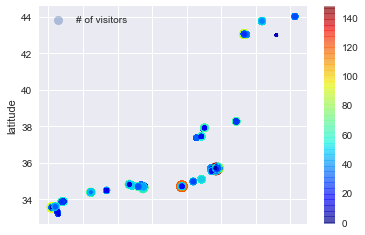

In [13]:
train.plot(kind="scatter", x="longitude", y="latitude", 
                              alpha=0.4, s=train["mean_visitors"], 
                              label="# of visitors", c=train["mean_visitors"], 
                              cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


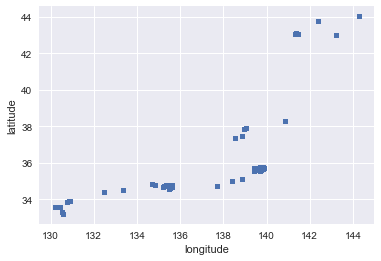

In [14]:
test.plot(kind="scatter", x="longitude", y="latitude", 
                              alpha=0.4)
plt.legend()

In [15]:
ts = pd.DataFrame(train[['visit_date', 'air_area_name', 'air_genre_name', 
                         'cluster', 'day_of_week', 'holiday_flg', 'visitors', 'visitor_diff']])
ts = ts.set_index('visit_date')
ts.index = ts.index.to_datetime()
ts.index.name = 'visit_date'

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  after removing the cwd from sys.path.


In [16]:
ts = ts.sort_index()

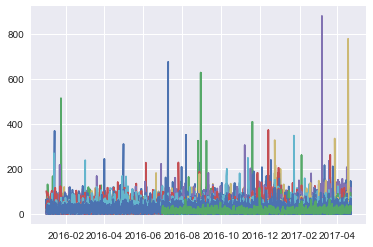

In [17]:
for area in np.unique(ts.air_area_name):
    plt.plot(ts[ts.air_area_name == area]['visitors'])

plt.show()

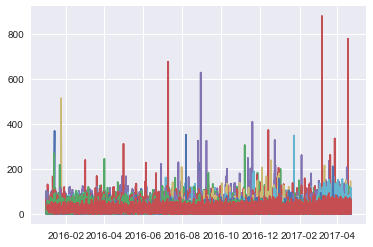

In [18]:
for genre in np.unique(ts.air_genre_name):
    plt.plot(ts[ts.air_genre_name == genre]['visitors'], label = genre)
    
plt.show()

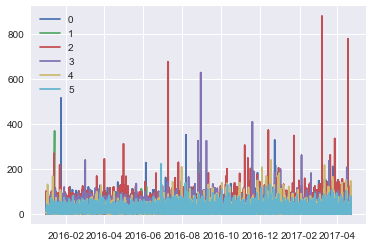

In [19]:
for clus in np.unique(ts.cluster):
    plt.plot(ts[ts.cluster == clus]['visitors'], label = clus)
    
plt.legend(loc='best')
plt.show()

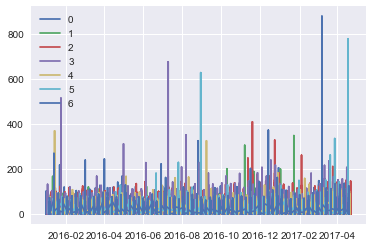

In [20]:
for dow in np.unique(ts.day_of_week):
    plt.plot(ts[ts.day_of_week == dow]['visitors'], label = dow)
    
plt.legend(loc='best')
plt.show()

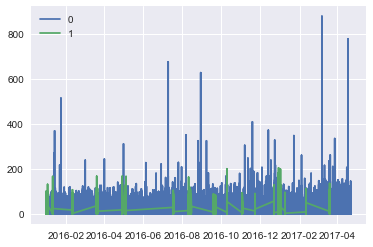

In [21]:
for hol in np.unique(ts.holiday_flg):
    plt.plot(ts[ts.holiday_flg == hol]['visitors'], label = hol)
    
plt.legend(loc='best')
plt.show()

In [45]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries, label):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries[label], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  
D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  import sys


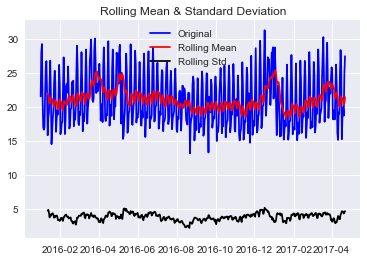

Results of Dickey-Fuller Test:
Test Statistic                  -3.796104
p-value                          0.002947
#Lags Used                      16.000000
Number of Observations Used    461.000000
Critical Value (1%)             -3.444615
Critical Value (5%)             -2.867830
Critical Value (10%)            -2.570120
dtype: float64


In [46]:
test_stationarity(ts[['visitors']], 'visitors')

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  
D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  import sys


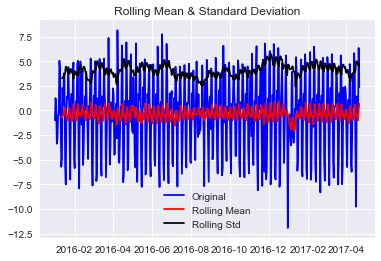

Results of Dickey-Fuller Test:
Test Statistic                -6.438765e+00
p-value                        1.627803e-08
#Lags Used                     1.800000e+01
Number of Observations Used    4.590000e+02
Critical Value (1%)           -3.444677e+00
Critical Value (5%)           -2.867857e+00
Critical Value (10%)          -2.570135e+00
dtype: float64


In [47]:
test_stationarity(ts[['visitor_diff']], 'visitor_diff')

In [78]:
for i in range(1, 50):
    print("KPSS test for lag = ", i, kpss(ts.visitors, lags=i))

KPSS test for lag =  1 (0.34745291720293037, 0.09980477706770242, 1, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  2 (0.33249457468950838, 0.1, 2, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  3 (0.36517104225909153, 0.09216765419866745, 3, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  4 (0.43021347378749314, 0.06413212336745985, 4, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  5 (0.5062377884038739, 0.04026175936849687, 5, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  6 (0.50993921939090403, 0.03942810374078738, 6, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  7 (0.43181757785928315, 0.06344069919858486, 7, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  8 (0.36438849149711106, 0.09250496056159006, 8, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\statsmodels\tsa\stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [76]:
for i in range(1, 8):
    print("KPSS test for lag = ", i, kpss(ts.visitor_diff, lags=i))

KPSS test for lag =  1 (0.0038194633065170105, 0.1, 1, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  2 (0.0046438844900740118, 0.1, 2, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  3 (0.0061825267003197334, 0.1, 3, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  4 (0.0093187500595827092, 0.1, 4, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  5 (0.021615489584005228, 0.1, 5, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  6 (0.053200255924703503, 0.1, 6, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  7 (0.025433700521005062, 0.1, 7, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\statsmodels\tsa\stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [25]:
ts = ts.groupby(ts.index).mean()
ts_dates = ts.index.to_series().as_matrix()
ts_visitors = ts.visitors.as_matrix()

window_size = 16
window = np.ones(window_size)/float(window_size)
ts_avg = np.convolve(ts_visitors, window, 'same')

# create a new plot with a a datetime axis type
p = figure(width=800, height=350, x_axis_type="datetime")

# add renderers
p.circle(ts_dates, ts_visitors, 
         size=4, color='darkgrey', alpha=0.2, legend='close')
p.line(ts_dates, ts_avg, color='navy', legend='avg')

# NEW: customize by setting attributes
p.title.text = "Visitors 16 Day Average"
p.legend.location = "top_left"
p.grid.grid_line_alpha=0
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Visitors'
p.ygrid.band_fill_color="olive"
p.ygrid.band_fill_alpha = 0.1

# show the results
show(p)

In [26]:
ts = ts.groupby(ts.index).mean()
ts_dates = ts.index.to_series().as_matrix()
ts_visitors = ts.visitor_diff.as_matrix()

window_size = 16
window = np.ones(window_size)/float(window_size)
ts_avg = np.convolve(ts_visitors, window, 'same')

# create a new plot with a a datetime axis type
p = figure(width=800, height=350, x_axis_type="datetime")

# add renderers
p.circle(ts_dates, ts_visitors, 
         size=4, color='darkgrey', alpha=0.2, legend='close')
p.line(ts_dates, ts_avg, color='navy', legend='avg')

# NEW: customize by setting attributes
p.title.text = "Visitors 16 Day Average"
p.legend.location = "top_left"
p.grid.grid_line_alpha=0
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Visitors'
p.ygrid.band_fill_color="olive"
p.ygrid.band_fill_alpha = 0.1

# show the results
show(p)

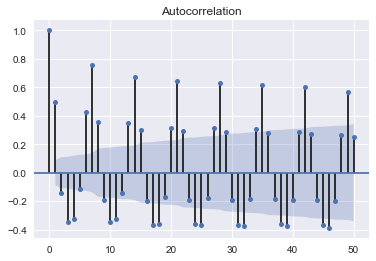

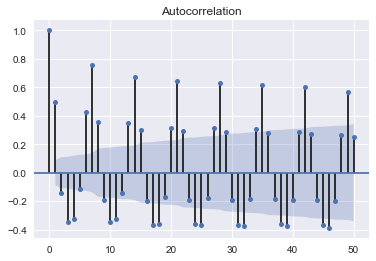

In [27]:
plot_acf(ts.visitors, lags=50)

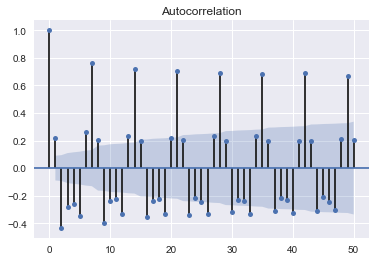

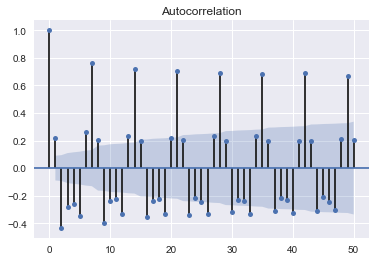

In [28]:
plot_acf(ts.visitor_diff, lags=50)

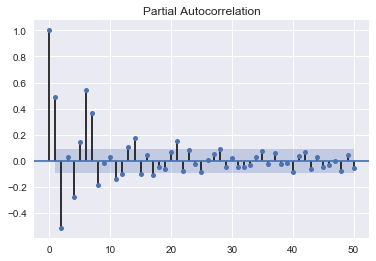

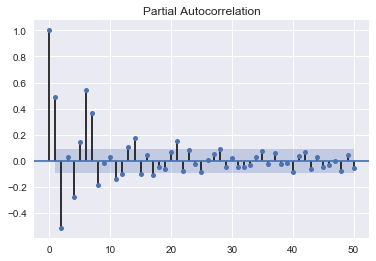

In [29]:
plot_pacf(ts.visitors, lags=50)

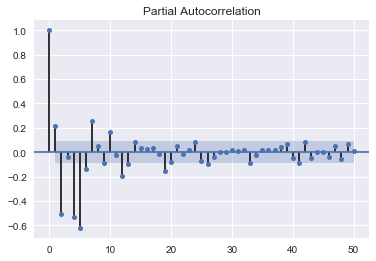

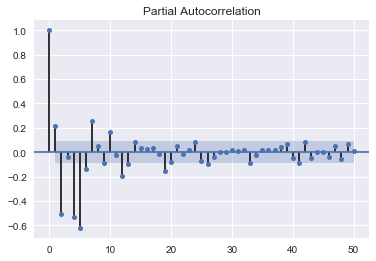

In [30]:
plot_pacf(ts.visitor_diff, lags=50)

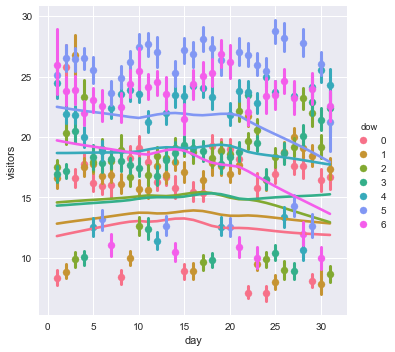

In [31]:
ax = sns.lmplot(x="day", y="visitors", x_estimator=np.mean, data=combined, hue="dow", lowess=True)

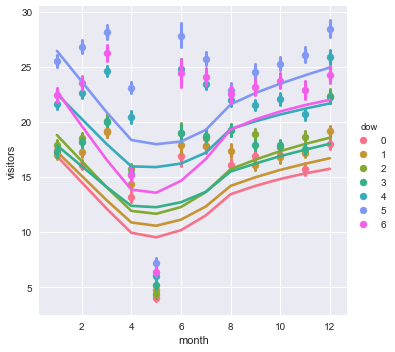

In [32]:
ax = sns.lmplot(x="month", y="visitors", x_estimator=np.mean, data=combined, hue="dow", lowess=True)

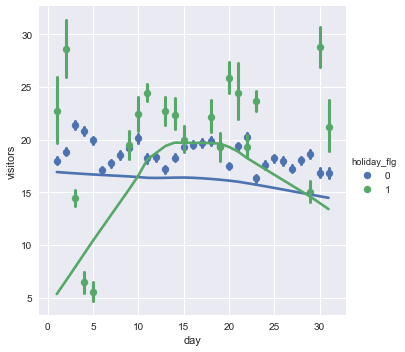

In [33]:
ax = sns.lmplot(x="day", y="visitors", x_estimator=np.mean, data=combined, hue="holiday_flg", lowess=True)

(0, 40)

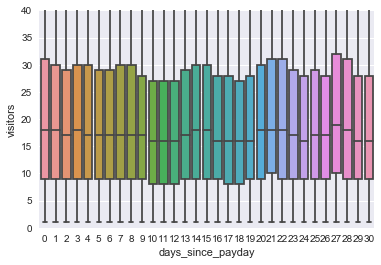

In [42]:
sns.boxplot(x="days_since_payday", y="visitors", data=train)

plt.ylim(0, 40)

(0, 40)

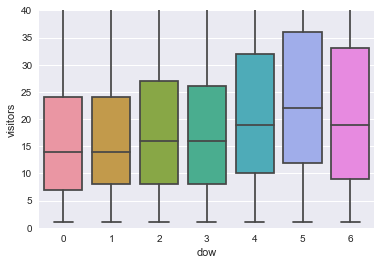

In [48]:
sns.boxplot(x="dow", y="visitors", data=train)

plt.ylim(0, 40)

(0, 40)

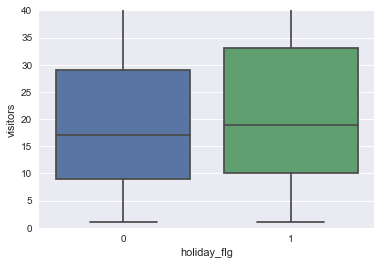

In [49]:
sns.boxplot(x="holiday_flg", y="visitors", data=train)

plt.ylim(0, 40)

(0, 100)

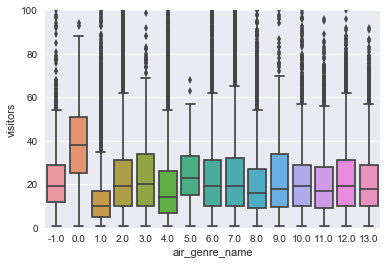

In [54]:
sns.boxplot(x="air_genre_name", y="visitors", data=train)

plt.ylim(0, 100)